<a href="https://colab.research.google.com/github/EdinMehanovic/Saving_Money_Via_A_Predictive_Model/blob/main/Saving_Money_Via_A_Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Saving Money Via A Predictive Model
##By Edin Mehanovic & Jack DeLong
###05-07-2024

We developed a model based off of the provided dataset from Service Express. This model is used to answer our question: if a client of Service Express provides a prompt of a computer part they need repaired, then can we accurately predict what part requires repair based off of that prompt?

#Dataset Provided

Below is a copy of the dataset we were provided for this project. We ran this dataset in Google Colab, which is an application that runs Python Notebooks while providing free computing power to its users.

https://drive.google.com/file/d/1rVl5fss4P45hNyfXUspVcY7TKjHFM3oA/view?usp=sharing

To make this Python Notebook work, click the link above, click on the three dots at the top, then click 'Organize' and put it into your 'My Drive' folder.


#Loading In Libraries

In [ ]:
import pandas as pd # This library is our main data analysis and manipulation tool.
import numpy as np # Is useful for the large arrays we deal with that have a lot of built-in functions with it.
import matplotlib.pyplot as plt # This helps us make plots.
from sklearn.feature_selection import chi2 # This is mainly used to check the correlation of words for categorical variables.
from sklearn.model_selection import train_test_split # This allows us to split our data into testing and training datasets.
from sklearn.feature_extraction.text import TfidfTransformer # This converts the words in our dataset into a numerical value.
from sklearn.feature_extraction.text import TfidfVectorizer # This checks the originality of the words in our dataset.
from sklearn.svm import LinearSVC # This is an algorithm that is mainly used for NLP applications.
from sklearn.model_selection import cross_val_score # This allows us to use cross validation with our model.
from google.colab import data_table # Allows us to enable and disable interactive tables.

#Mounting Our GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


# Description Of Our Variables

The code chunk below showcases each of our column names and a short description of each of them.


In [ ]:
description = pd.read_csv('Variable Description.csv')
data_table.enable_dataframe_formatter()
description

,Column,Definition
0,Ticket Number,Identifying number for a ticket
1,Call Date,Date the ticket was called in
2,Completed Date,Date the ticket was completed
3,Ticket Problem,Free text field describing the issue the ticke...
4,Ticket ModelNumber,Model number of the equipment the ticket is be...
5,Ticket PartNumber,Part number of the equipment the ticket is bei...
6,Ticket Short Description,Short description of the equipment the ticket ...
7,Ticket Manufacturer,Manufacturer of the equipment the ticket is be...
8,Ticket Category,Category of the equipment the ticket is being ...
9,Ticket Type,Type of the equipment the ticket is being call...


#Loading The Dataset

With our columns described, we load the dataset so we can start preparing it for our model.


In [ ]:
project = pd.read_csv('Aquinas Parts Prediction Data 2024.csv')
data_table.disable_dataframe_formatter()
project

#Cleaning The Dataset

With our dataset loaded in, we clean it to prepare it for analysis.

To clean the dataset, we perform the following tasks:
- Remove or impute any NAs that occur
- Remove any phrases or words that could or words that could confuse our model
- Replace spaces in our column header with an underscore
- Change all letters in our dataset into lowercase
- Remove any special characters, and;
- Remove events with low occurrences

We make a copy of the dataset to begin cleaning.

In [ ]:
projectv2 = project.copy(deep = True)

We remove any NAs in the dataset to make our data usable for our model. We are not imputing our NA values because the NAs occur in non-numerical columns making it impossible for us to replace them with the mean or median.

In [ ]:
projectv3 = projectv2.dropna()
projectv3

,Ticket Number,Call Date,Completed Date,Ticket Problem,Ticket ModelNumber,Ticket PartNumber,Ticket Short Description,Ticket Manufacturer,Ticket Category,Ticket Type,Ticket Product Family,Used PartNumber,Used Short Description,Used Manufacturer,Used Category,Used Type,Used Product Family
0,1214812,1/11/2024,1/12/2024,2 failed hdd 15K 600GB SAS,EQUALLOGIC PS4100X,PS4100X,DISK ARRAY,Dell,Storage,CONTROLLER,Dell Disk Storage,002R3X,INVALID,Unknown,Unknown,Unknown,Unknown
1,1223313,2/14/2024,2/15/2024,Failed SAS HDD. Model ST360057SS. Size 558.91GB.,EQUALLOGIC PS6110XV,PS6110XV,DISK ARRAY,Dell,Storage,CONTROLLER,Dell Disk Storage,002R3X,INVALID,Unknown,Unknown,Unknown,Unknown
2,1202000,11/14/2023,11/17/2023,Issues trying to join new node to cluster. I h...,ISILON X200 36TB,X200-SATA-020,DISK ARRAY,EMC,STORAGE,CONTROLLER,EMC DataDomain/Isilon/Avamar Disk Storage,003-0080-01,CABLE,Unknown,Unknown,Unknown,Unknown
3,1165228,6/8/2023,6/20/2023,"T10000C in library 1 bay 33 needs replacing, h...",STK SL8500,SL8500,TAPE LOADER,STK,Storage,tape,STK Tape Drive / Library,003-5290-01,TAPE DRIVE,Unknown,Unknown,Unknown,Unknown
4,1203565,11/21/2023,12/4/2023,T10000C drive in library 2 bay 20 cannot posit...,STK SL8500,SL8500,TAPE LOADER,STK,Storage,tape,STK Tape Drive / Library,003-5290-01,TAPE DRIVE,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45851,1175602,7/25/2023,8/3/2023,3 Bad HDDManufacturerSEAGATEProduct IDST4000NM...,POWEREDGE R730XD,PER730XD,SYSTEM,Dell,System,System,Dell PowerEdge Servers,YXG4K,DISK DRIVE,Dell,Storage,Disk,Dell PowerEdge Servers
45852,1221629,2/7/2024,2/9/2024,Physical Disk 0:1:3 | Slot 3 | Size: 3725.50 G...,POWEREDGE R530,PER530,SYSTEM,Dell,System,System,Dell PowerEdge Servers,YXG4K,DISK DRIVE,Dell,Storage,Disk,Dell PowerEdge Servers
45853,1199522,11/3/2023,11/16/2023,Failed Disk Pool Physical Disk - Disk_Pool_1 S...,POWERVAULT MD3460,PVMD3460,DISK ARRAY,Dell,Storage,CONTROLLER,Dell Disk Storage,YXG4K,DISK DRIVE,Dell,Storage,Disk,Dell PowerEdge Servers
45854,1146847,3/20/2023,3/21/2023,"Failing hard drive, SAS 2TB 7.2k",POWEREDGE R510,PER510,SYSTEM,Dell,System,System,Dell PowerEdge Servers,YY34F,DISK DRIVE,Dell,Storage,Disk,Dell PowerEdge Servers


We also remove any possible duplicates that could be present to make our data more representative instead of it being skewed in one direction. In our case, a duplicate occurs when two rows have the same values for every column.

The **drop_duplicates()** function checks for rows that are duplicates and drops all the duplicates other than the first or last one based on the choice of the user. This choice does not matter for our model; we chose to keep the first.

In [ ]:
projectv4 = projectv3.drop_duplicates(keep='first')
projectv4

We make all letters in our dataset lowercase to make the data more consistent.

In [ ]:
projectv5 = projectv4
projectv5 = projectv5.applymap(lambda s: s.lower() if type(s) == str else s)
projectv5

Removing spaces in our column headers and replacing them with underscores allows us to incorporate column data into our functions where applicable.


In [ ]:
projectv6 = projectv5
projectv6.columns = projectv6.columns.str.replace(' ', '_')
projectv6

We remove any *unknown*s or similar words in our dataset.

Our function below removes all the rows containing *unknown* as a value in the 'Used_Manufacturer' column.

In [ ]:
unknown_removal = projectv6['Used_Manufacturer'] == 'unknown'
projectv7 = projectv6[~unknown_removal]

We will have to repeat this process several times for the other columns with similar or unnecessary words.

In [ ]:
invalid_removal = projectv7['Used_Short_Description'] == 'invalid'
projectv8 = projectv7[~invalid_removal]

In [ ]:
not_sure_removal = projectv8['Used_Short_Description'] == 'not sure'
projectv9 = projectv8[~not_sure_removal]

In [ ]:
invalid_removal = projectv9['Ticket_Short_Description'] == 'invalid'
projectv10 = projectv9[~invalid_removal]

In [ ]:
unknown_removal = projectv10['Ticket_Short_Description'] == 'unknown'
projectv11 = projectv10[~unknown_removal]

In [ ]:
unknown_removal = projectv11['Ticket_Product_Family'] == 'unknown'
projectv12 = projectv11[~unknown_removal]

In [ ]:
unknown_removal = projectv12['Used_Short_Description'] == 'unknown'
projectv13 = projectv12[~unknown_removal]

Our **value_counts()** function reveals that we have many values that only show up a few times. To improve our model's accuracy, we remove any values that show up less than 80 times. This number was simply chosen because we deemed any events lower than this number to be uncommon enough to warrant more thorough attention.

In [ ]:
projectv13["Used_Short_Description"].value_counts()

Used_Short_Description
disk drive       17616
memory            2954
battery           1469
controller         880
network            849
tape drive         402
nic card           353
cpu                351
power supply       340
system board       294
system             247
adapter            106
tape loader         94
gbic                89
disk                48
ups                 35
nic                 34
disk array          32
fan                 29
cd-rom drive        10
enclosure            9
dvd-rom              8
interface            7
expansion            6
graphics             4
monitor              4
ethernet             3
svc processor        3
switch               3
keyboard             3
laptop               3
magazine             2
vrm                  2
tape                 1
kvm                  1
hardware             1
tray                 1
cable                1
admin                1
terminal             1
mech assy            1
Name: count, dtype: int64

We remove events with low occurrences from the 'Used_Short_Description' column. This column is our response variable for our project, which we are trying to predict the values of.

In [ ]:
projectv14 = projectv13.drop(projectv13[projectv13.Used_Short_Description.isin([
    "mech assy", "terminal","admin","cable","tray","hardware","kvm","tape","vrm",
    "magazine","laptop","keyboard","switch","svc processor","ethernet","monitor",
    "graphics","expansion","interface","dvd-rom","enclosure","cd-rom drive","fan",
    "disk array","nic","ups","disk"])].index)
projectv14["Used_Short_Description"].value_counts()

Used_Short_Description
disk drive      17616
memory           2954
battery          1469
controller        880
network           849
tape drive        402
nic card          353
cpu               351
power supply      340
system board      294
system            247
adapter           106
tape loader        94
gbic               89
Name: count, dtype: int64

To clean our feature variable column, 'Ticket_Problem', we remove any punctuation and symbols that could confuse our model.

We add another column to our dataset called 'Clean_Problems', which contains our cleaned 'Ticket_Problems' data.

In [ ]:
projectv14["Ticket_Problem"]

In [ ]:
projectvf = projectv14.copy(deep = True)
projectvf["Clean_Problems"] = projectvf["Ticket_Problem"]

In [ ]:
projectvf['Clean_Problems'] = projectvf['Clean_Problems'].str.replace('-',' '
).str.replace(':',' ').str.replace('[',' ').str.replace(']',' ').str.replace(',',' '
).str.replace('.',' ').str.replace('!',' ').str.replace('?',' ').str.replace(';',' '
).str.replace('§',' ').str.replace('=',' ').str.replace("'",' ').str.replace('{',' '
).str.replace('}',' ').str.replace(')',' ').str.replace('(',' ').str.replace('<',' '
).str.replace('>',' ').str.replace('+',' ').str.replace('*',' ').str.replace('&',' '
).str.replace('^',' ').str.replace('%',' ').str.replace('$',' ').str.replace('/',' '
).str.replace('|',' ').str.replace('\\',' ').str.replace('"',' ').str.replace('@',' '
).str.replace('#',' ').str.replace('_',' ')
projectvf[['Ticket_Problem','Clean_Problems']]

Our dataset is now clean, and we move on to building our model.

#Factorizing Our Response Variable

To correctly predict our 'Used_Short_Description' variable, we have to factorize the values into numbers ranging from 0 up to the number of different values that occur.

The **factorize()** function changes our text values for a specific column into numbers. We selected our cleaned dataset, projectvf, and the text in the column we wish to factorize into a numerical value, 'Used_Short_Description', and will now make a new column called 'category_id' to contain our factorized values.

In [ ]:
projectvf['category_id'] = projectvf['Used_Short_Description'].factorize()[0]
category_id_df = projectvf[['Used_Short_Description', 'category_id']].drop_duplicates()
projectvf

,Ticket_Number,Call_Date,Completed_Date,Ticket_Problem,Ticket_ModelNumber,Ticket_PartNumber,Ticket_Short_Description,Ticket_Manufacturer,Ticket_Category,Ticket_Type,Ticket_Product_Family,Used_PartNumber,Used_Short_Description,Used_Manufacturer,Used_Category,Used_Type,Used_Product_Family,Clean_Problems,category_id
10,1177913,8/3/2023,8/7/2023,failed drive - m/n: st8000nm0045-1rl112,isilon h500 120tb,ih500-8t-1.6t,controller,emc,storage,controller,emc datadomain/isilon/avamar disk storage,5032999,disk drive,emc,storage,disk,emc datadomain/isilon/avamar disk storage,failed drive m n st8000nm0045 1rl112,0
11,1144592,3/10/2023,3/17/2023,failed hard drive.,isilon h400 120tb,ih400-8t-1.6t,controller,emc,storage,controller,emc datadomain/isilon/avamar disk storage,5032999,disk drive,emc,storage,disk,emc datadomain/isilon/avamar disk storage,failed hard drive,0
12,1196001,10/19/2023,10/20/2023,bad drive,isilon h400 120tb,ih400-8t-1.6t,controller,emc,storage,controller,emc datadomain/isilon/avamar disk storage,5032999,disk drive,emc,storage,disk,emc datadomain/isilon/avamar disk storage,bad drive,0
14,1160143,5/15/2023,5/19/2023,3 drives that had been replaced but were unabl...,isilon a200 30tb,ia200-2t-400g,controller,emc,storage,controller,emc datadomain/isilon/avamar disk storage,5033000,disk drive,emc,storage,disk,emc datadomain/isilon/avamar disk storage,3 drives that had been replaced but were unabl...,0
15,1151462,4/6/2023,4/10/2023,device name na drive type and model na logical...,isilon a200 30tb,ia200-2t-400g,controller,emc,storage,controller,emc datadomain/isilon/avamar disk storage,5033000,disk drive,emc,storage,disk,emc datadomain/isilon/avamar disk storage,device name na drive type and model na logical...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45851,1175602,7/25/2023,8/3/2023,3 bad hddmanufacturerseagateproduct idst4000nm...,poweredge r730xd,per730xd,system,dell,system,system,dell poweredge servers,yxg4k,disk drive,dell,storage,disk,dell poweredge servers,3 bad hddmanufacturerseagateproduct idst4000nm...,0
45852,1221629,2/7/2024,2/9/2024,physical disk 0:1:3 | slot 3 | size: 3725.50 g...,poweredge r530,per530,system,dell,system,system,dell poweredge servers,yxg4k,disk drive,dell,storage,disk,dell poweredge servers,physical disk 0 1 3 slot 3 size 3725 50 g...,0
45853,1199522,11/3/2023,11/16/2023,failed disk pool physical disk - disk_pool_1 s...,powervault md3460,pvmd3460,disk array,dell,storage,controller,dell disk storage,yxg4k,disk drive,dell,storage,disk,dell poweredge servers,failed disk pool physical disk disk pool 1 s...,0
45854,1146847,3/20/2023,3/21/2023,"failing hard drive, sas 2tb 7.2k",poweredge r510,per510,system,dell,system,system,dell poweredge servers,yy34f,disk drive,dell,storage,disk,dell poweredge servers,failing hard drive sas 2tb 7 2k,0


Below are the output values for each part that has been factorized. The text values in 'Used_Short_Description' correlate with their numerical value in 'category_id'. For instance, disk drive is zero, controller is one, nic card is two, etc.

In [ ]:
category_id_df

#Distribution For Each Value In 'Used_Short_Description'

The following is a distribution chart showing the parts that were repaired. Disk drive is the most common repair issue by far.

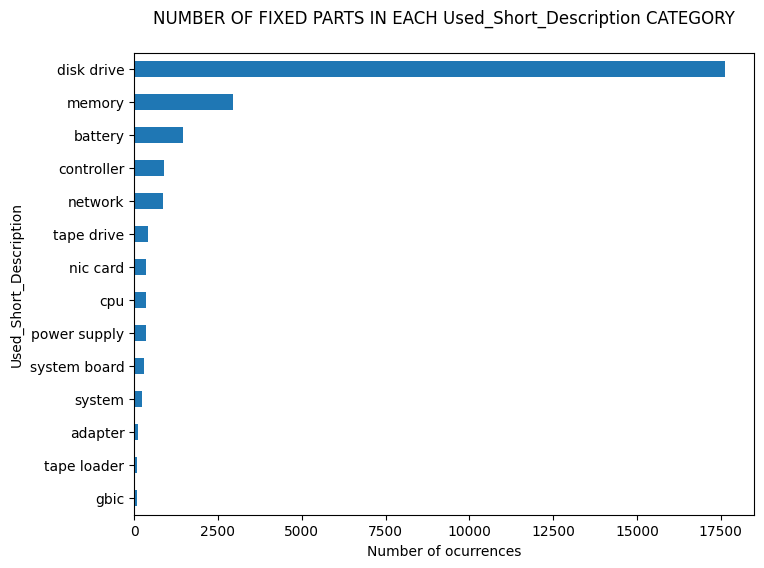

In [ ]:
fig = plt.figure(figsize=(8,6))
projectvf.groupby('Used_Short_Description').Clean_Problems.count().sort_values().plot.barh(
    ylim=0, title= 'NUMBER OF FIXED PARTS IN EACH Used_Short_Description CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

#Using Tfidf For NLP

We use tfidf for our analysis, which stands for Term Frequency, Inverse Document Frequency. This turns our text into numerical values which can then be analyzed, demonstrated in our features array below.

**TfidfVectorizer()** is used for turning the text in a specific column into a numerical value we can analyze. We set paramaters in said function to dictate what text we want to keep and change into numerical values, and what text to omit from this process. We expain each of the functions function in **TfidfVectorizer()**.

**sublinear_tf = True** This makes it so that the tfidfVectorizer is linear instead of logarithmic function.

**min_df = u** This function is useful for removing words or text that show up only a few times. The u in the function above means to dicard text that occurs less than u times.

The **ngram(x,y)_range = (x,y)** function allows the user to select the range of ngrams. An ngram is a sequence of words or symbols that is n long. For instance, a bigram (denoting two sequential words, in our case) would be "broken monitor." The x and y values of the function are indicative of both ends of the range: the x value determines the shortest ngram length, and the y value determines the longest length. Plugging in ngram(1,3) will produce correlated unigrams (1), bigrams (2), and trigrams (3) in 'Clean_Problems'.

**stop_words** This function removes common words that do not correlate with what we are trying to predict with our model. Some stop words are "The", "Is", "And", etc..

We then use the **tfidf.fit_transform()** function, which we fit onto our dataset and a specific column we wish to transform. We set this equal to a variable, which we have named features, in order to call back to this array for future use down the line. We are left with an array of numerical values that are correlated with unigram and bigrams.

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                        min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

features = tfidf.fit_transform(projectvf.Clean_Problems).toarray()

labels = projectvf.category_id

print("Each of the %d Ticket_Problems is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 26044 Ticket_Problems is represented by 26330 features (TF-IDF score of unigrams and bigrams)


In [ ]:
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08198653, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
labels

10        0
11        0
12        0
14        0
15        0
         ..
45851     0
45852     0
45853     0
45854     0
45855    10
Name: category_id, Length: 26044, dtype: int64

We can display the most correlated unigrams and bigrams for each output value. This is done in a for loop, demonstrated below.

**chi2()** This is mainly used to check the correlation of words for our categorical variables.

**argsort()** This function helps us sort the indices for our 'features_chi2' variable.


In [ ]:
category_to_id = dict(category_id_df.values)
N = 3
for Used_Short_Description, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Used_Short_Description))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> adapter:
  * Most Correlated Unigrams are: flexfabric, flexiblelom, 650flb
  * Most Correlated Bigrams are: 650flb adapter, flexfabric 20gb, port 650flb

==> battery:
  * Most Correlated Unigrams are: smart, cache, battery
  * Most Correlated Bigrams are: smart storage, cache module, storage battery

==> controller:
  * Most Correlated Unigrams are: controller, hba, mezz
  * Most Correlated Bigrams are: mezz cards, fault mezz, controller failure

==> cpu:
  * Most Correlated Unigrams are: processor, xeon, cpu
  * Most Correlated Bigrams are: cpu error, machine check, intel xeon

==> disk drive:
  * Most Correlated Unigrams are: drive, memory, dimm
  * Most Correlated Bigrams are: hard drive, memory error, cache module

==> gbic:
  * Most Correlated Unigrams are: uw, sfps, sfp
  * Most Correlated Bigrams are: sfp port, replace sfp, power dbm

==> memory:
  * Most Correlated Unigrams are: correctable, memory, dimm
  * Most Correlated Bigrams are: memory errors, correctable memory, m

Represented in the output of our for loop, we can see what we would expect to show up.

For example, if the power supply is broken, you would expect to see "power supply" to be written down as a part of a Ticket Problem. And we can see that above as a highly correlated bigram with *power supply*.

This isn't perfect, as we can see that "r04 0xdead4ecc" is written as a highly correlated bigram for *nic card*, which doesn't make any sense.

The unigrams and bigrams generally make sense for the given values.



#Building The Model

For our model, we initially tested 4 different models: Random Forest, Logistic Regression, Neural Network and LinearSVC. The one that remains the most accurate is LinearSVC (Linear Support Vector Classifier), a model best suited for NLP applications. We also implemented the function **cross_val_score()** for our model since it splits the data into testing and training and allows us to use cross-validation, which runs the model as many times as the user implements. We used 5 since it was a good middle ground between underfitting and overfitting.

**random_state=0** is also a useful function. It removes the random building of the model, so we can properly see if the model increases in accuracy, rather than the model randomly increasing or decreasing if it was left completely random.





In [ ]:
models = [
    LinearSVC(max_iter = 1000, random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,LinearSVC,0,0.848723
1,LinearSVC,1,0.859090
2,LinearSVC,2,0.863313
3,LinearSVC,3,0.893454
4,LinearSVC,4,0.898618


We ran our model 5 times and can see the accuracy of each of them, they went up with each given iteration and hit the peak of 89.9%.

We then calculated the mean accuracy of our model and the standard deviation.

#Calculating Our Accuracy

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1,
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.87264,0.022083


We have an accuracy of about 87.3% and a standard deviation of 2.2% with our given model.



#Predicting What Part To Fix With A Given Prompt

With the code chunk below, we can insert prompts into the model to see what part it predicts is needed.

In [ ]:
X = projectvf['Clean_Problems']
Y = projectvf['Used_Short_Description']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)


model1 = LinearSVC().fit(tfidf_vectorizer_vectors, Y_train)

In [ ]:
problem = "hardware issue with cpu 3/memory  cpu3 b1/d1 j0702 side 1 (bank 2), cpu module c3"
print("This prompt should predict system board, it predicts",model1.predict(fitted_vectorizer.transform([problem])))

This prompt should predict system board, it predicts ['system board']


In [ ]:
problem = "critical: memory module 4 b1, 32768 mb: error: failure modes not available via snmpbr system: poweredge r730xd, sn: 1qz8rd2"
print("This prompt should predict memory, it predicts",model1.predict(fitted_vectorizer.transform([problem])))

This prompt should predict memory, it predicts ['memory']


In [ ]:
problem = "server down  probable failed 10gb nic dark ln, morpeth ne61 1hq 01670 517219 (option 9 duty manager) store close 9pm  please arrive 30mins before close"
print("This prompt should predict nic card, it predicts",model1.predict(fitted_vectorizer.transform([problem])))

This prompt should predict nic card, it predicts ['nic card']


In [ ]:
problem = "part #830272b21 hpe 1600w fs plat ht plg lh pwr sply kit part number: 830272b21 | quantity: 1 | request type: parts needed"
print("This prompt should predict power supply, it predicts", model1.predict(fitted_vectorizer.transform([problem])))

This prompt should predict power supply, it predicts ['power supply']


In [ ]:
problem = "2nd fiber channel connection is down"
print("This prompt should predict gbic, it predicts", model1.predict(fitted_vectorizer.transform([problem])))

This prompt should predict gbic, it predicts ['gbic']


We were able to predict 5/5 prompts given.

#Only Choosing 80 Samples Of Each Unique Value In 'Used_Short_Description' Column

We want to test if our model can work on a more realistic interpretation of the data by sampling a portion of it.

Using the **sample(n=x)** function, we can select x number entries in the dataset. We chose to sample 80 of each unique value in the 'Used_Short_Description' column. We are left with 14 unique values times 80 entries per unique value, which gives us 1120 entries.

We performed the same procedures but changed the variable names where applicable.

In [ ]:
projectvf2=projectvf.groupby("Used_Short_Description").sample(n=80, random_state=0)
projectvf2

,Ticket_Number,Call_Date,Completed_Date,Ticket_Problem,Ticket_ModelNumber,Ticket_PartNumber,Ticket_Short_Description,Ticket_Manufacturer,Ticket_Category,Ticket_Type,Ticket_Product_Family,Used_PartNumber,Used_Short_Description,Used_Manufacturer,Used_Category,Used_Type,Used_Product_Family,Clean_Problems,category_id
27910,1217740,1/23/2024,1/25/2024,the embedded flash device on the server has fa...,proliant dl380pg8,665554-b21,system,hp,system,system,hp proliant servers,cv211,adapter,aten,system,io,other,the embedded flash device on the server has fa...,6
9543,1153893,4/17/2023,8/21/2023,8.16.23 eobd amber lights front panel: pci br...,xseries 3950,8878-ac1,system,ibm,system,system,ibm entry servers - xseries,44t1412,adapter,ibm,system,io,ibm entry servers - xseries,8 16 23 eobd amber lights front panel pci br...,6
17741,1168523,6/23/2023,6/27/2023,both nic cards are showing as unplugged.,proliant bl460cg9,727028-b21,system,hp,system,system,hp proliant servers,701536-001,adapter,hp,system,io,hp proliant servers,both nic cards are showing as unplugged,6
1867,1158427,5/8/2023,5/9/2023,ibm 3550m4-10gb nic card is out on this server...,xseries 3550m4,7914-eau,system,ibm,system,system,ibm entry servers - xseries,00y7731,adapter,ibm,system,io,ibm entry servers - xseries,ibm 3550m4 10gb nic card is out on this server...,6
10953,1169786,6/29/2023,7/5/2023,pci light path error. replace pci card. taking...,xseries 3650m3,7945-n2g,system,ibm,system,system,ibm entry servers - xseries,49y7949,adapter,ibm,system,io,ibm entry servers - xseries,pci light path error replace pci card taking...,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,1138803,2/23/2023,2/28/2023,library failure,3573-l32,3573-l32,tape loader,ibm,storage,tape library,ibm enterprise tape storage,3573-l32,tape loader,ibm,storage,tape library,ibm enterprise tape storage,library failure,13
7189,1168830,6/25/2023,7/1/2023,dead tape drive type: 3580,3581-l28,3581-l28,tape loader,ibm,storage,tape library,tape drive / library,3581-l28,tape loader,ibm,storage,tape library,tape drive / library,dead tape drive type 3580,13
7139,1195541,10/18/2023,10/16/2023,equipment affected not listed. windows server ...,ts3100,3573-l2u,tape loader,ibm,storage,tape library,tape drive / library,3573-l2u,tape loader,ibm,storage,tape library,tape drive / library,equipment affected not listed windows server ...,13
29221,1159628,5/12/2023,5/18/2023,hp storageworks/hp lto-4 ultrium 1840 tape dri...,eh926a,eh926a,tape loader,hp,storage,tape,tape drive / library,eh926a,tape loader,hp,storage,tape,tape drive / library,hp storageworks hp lto 4 ultrium 1840 tape dri...,13


#Using Tfidf For Our Sampled Data

We set the same parameters as we did previously so we can properly compare our final models with one another.

In [ ]:
tfidf2 = TfidfVectorizer(sublinear_tf=True,
                         min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

features2 = tfidf2.fit_transform(projectvf2.Clean_Problems).toarray()

labels2 = projectvf2.category_id

#Building The Model Using Our Sampled Data

We have the same code as our previous example so we can properly compare the two.

In [ ]:
models = [
    LinearSVC(random_state=0),
]

CV = 5
cv_df2 = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features2, labels2, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df2

,model_name,fold_idx,accuracy
0,LinearSVC,0,0.611607
1,LinearSVC,1,0.549107
2,LinearSVC,2,0.625000
3,LinearSVC,3,0.562500
4,LinearSVC,4,0.580357


#Finding The Accuracy Of The Sampled Data

In [ ]:
mean_accuracy2 = cv_df2.groupby('model_name').accuracy.mean()
std_accuracy2 = cv_df2.groupby('model_name').accuracy.std()

acc2 = pd.concat([mean_accuracy2, std_accuracy2], axis= 1,
          ignore_index=True)
acc2.columns = ['Mean Accuracy', 'Standard deviation']
acc2

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.585714,0.032099


Our sampled model has an accuracy of 58.6% and a standard deviation of 3.2%. Not as accurate as our full model, but we can estimate this occured because of the large reduction of data. This model may be a more equal representation of issues.

#Predicting What Part Needs To Be Fixed For The Sampled Data

In [ ]:
X_sample = projectvf['Clean_Problems']
Y_sample = projectvf['Used_Short_Description']
X_train_sample, X_test_sample, Y_train_sample, Y_test_sample = train_test_split(X_sample, Y_sample, test_size=0.25, random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

fitted_vectorizer_sample = tfidf.fit(X_train_sample)
tfidf_vectorizer_vectors_sample = fitted_vectorizer_sample.transform(X_train_sample)


model_sample = LinearSVC().fit(tfidf_vectorizer_vectors_sample, Y_train_sample)

The two code chunks below use the same prompt from our previous predictions. We wanted to compare the two to see if there were any changes.

In [ ]:
problem_sample = "2nd fiber channel connection is down"
print("This prompt should predict gbic, it predicts", model_sample.predict(fitted_vectorizer_sample.transform([problem_sample])))

This prompt should predict gbic, it predicts ['gbic']


In [ ]:
problem_sample = "server down  probable failed 10gb nic dark ln, morpeth ne61 1hq 01670 517219 (option 9 duty manager) store close 9pm  please arrive 30mins before close"
print("This prompt should predict nic card, it predicts", model_sample.predict(fitted_vectorizer_sample.transform([problem_sample])))

This prompt should predict nic card, it predicts ['nic card']


The predictions remained the same.

Here, we predict different prompts than our previous example.


In [ ]:
problem_sample = "server down wont boot. no lights except on power supplies. either a power module or sys board"
print("This prompt should predict system board, it predicts", model_sample.predict(fitted_vectorizer_sample.transform([problem_sample])))

This prompt should predict system board, it predicts ['system board']


In [ ]:
problem_sample = "this is request is the continuation of below service ticket for disk controller replacement. as per below ticket, you have already confirmed to replace the disk controller. so kindly do the needful to proceed with the replacement based on the confirmation from vmware, we are good to replace the disk controller. please ensure that the new disk controller has the same configuration as of old disk controller . service ticket #1200673"
print("This prompt should predict controller, it predicts", model_sample.predict(fitted_vectorizer_sample.transform([problem_sample])))

This prompt should predict controller, it predicts ['disk drive']


In [ ]:
problem_sample = "tape drive in slot 1,3 causing problems. drive losing communications with library during backups, causing backups to fail; this has happened on many runs. had to reboot library to manual eject tape out of drive. ras ticket: name: t022  tape drive communication failure ticket number: 100 state: unopened creation date: 06apr2023 3:07:28 severity: 2 last occurrence: 13apr2023 23:14:59 description: communication to the tape drive has failed inside the drive sled assembly. technical details fault description communication has failed inside the drive sled assembly drive location 1, 3 drive serial number 10wt049257 cleaning drive has not helped with this problem. cycling the library has not helped with this problem."
print("This prompt should predict tape drive, it predicts", model_sample.predict(fitted_vectorizer_sample.transform([problem_sample])))

This prompt should predict tape drive, it predicts ['tape drive']


Our new sampled prediction model correctly predicted 4 out of 5 prompts.

#Concluding Thoughts

We think a new policy that should be implemented is that repair engineers should bring a disk drive with them, since over 2/3 of the issues are related to disk drives. Also, engineers should be allowed to plug in the ticket problem that a client gives so our model can try to predict what part the engineer should bring to save money on transportation and time. If the engineer does go to the establishment and the part is incorrect, then our model either didn't predict correctly, or it was one of the uncommonly-occuring issues we omitted. If we had more data of the rare occurance issues, then we could easily reapply that back into our model to better include and predict their repair needs.